# Biblioteka Requests

In [6]:
from requests import get

f = get('http://docs.python.org')
s = f.text
f.close()

# print(s)

In [15]:
f = get('http://docs.python.org', stream=True)
# for i in f.iter_lines():
#     print(i.decode('UTF-8'))
f.close()

### Wyciąganie stolicy z Wikipedii

In [54]:
def stolica1(p):
    f = get('https://pl.wikipedia.org/wiki/'+p)
    s = f.text.split("Stolica")[3].split("title=")[1].split("\"")[1]
    f.close()
    return s
print("Stolica v1:",stolica1("Polska"))

def stolica2(p):
    f = get('https://pl.wikipedia.org/wiki/'+p, stream=True)
    b,c,d = "","",""
    for l in f.iter_lines():
        a,b,c,d = (b,c,d,l.decode('UTF-8'))
        if "Stolica" in a:
            f.close()
            return d.split('">',1)[1].split('<')[0]
        
print("Stolica v2:",stolica2("Polska"))

Stolica v1: Warszawa
Stolica v2: Warszawa


In [56]:
from time import time

panstwa = ["Polska","Niemcy","Szwecja","Indie","Japonia","Tanzania","Australia","Kolumbia"]

t = time()
print(list(map(stolica1,panstwa)))
print(time() - t)

t = time()
print(list(map(stolica2,panstwa)))
print(time() - t)

['Warszawa', 'Berlin', 'Sztokholm', 'Nowe Delhi', 'Tokio', 'Dodoma', 'Canberra', 'Bogota']
3.6858420372009277
['Warszawa', 'Berlin', 'Sztokholm', 'Nowe Delhi', 'Tokio', 'Dodoma', 'Canberra', 'Bogota']
2.783376932144165


# Wielowątkowość

### Wyświetlanie

In [57]:
from time import sleep

def old_print(*x):
    for i in x:
        print(i,end="")
        sleep(1e-5)
    print()
    sleep(1e-5)

In [61]:
def f(n):
    for i in range(n):
        old_print(i)

In [65]:
from threading import Thread

thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

old_print("The end")

0
01
The end
1
2

23

34

4
55

66

77

88

99



In [66]:
from threading import Thread

thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

00

11

2
2
33

44

55

66

77

88

99

The end


In [76]:
from threading import Thread, Lock

def f(n):
    for i in range(n):
        with lock:
            old_print(i)


lock = Lock()
thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


In [79]:
from threading import Thread, Lock

def f(n,lock):
    for i in range(n):
        with lock:
            old_print(i)


lock = Lock()
thread_1 = Thread(target=f, args=(10,lock))
thread_2 = Thread(target=f, args=(10,lock))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


### Lista

In [80]:
from threading import Thread

x = []

def f(*n):
    global x
    for i in range(n[0],n[1]):
        x.append(i)
        sleep(1e-5)

thread_1 = Thread(target=f, args=(1,10))
thread_2 = Thread(target=f, args=(1,10))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

print(x)
old_print("The end")

[1, 2, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
The end


### ZADANIE: Program który będzie uruchamiał n wątków

In [93]:
from threading import Thread, Lock

def f(n,lock):
    for i in range(n):
        with lock:
            old_print(i)

n = 5
# threads = []
lock = Lock()
# for i in range(n):
#     threads.append(Thread(target=f, args=(10,lock)))
#     threads[i].start()

# for i in range(n):
#     threads[i].join()

threads = [Thread(target=f, args=(10,lock)) for  _ in range(n)]
for w in threads:
    w.start()
    
for w in threads:
    w.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


In [104]:
t = time()
for p in panstwa:
    print(f'{p}: {stolica2(p)}')
print("Czas wykonania: ",time() - t)

Polska: Warszawa
Niemcy: Berlin
Szwecja: Sztokholm
Indie: Nowe Delhi
Japonia: Tokio
Tanzania: Dodoma
Australia: Canberra
Kolumbia: Bogota
Czas wykonania:  2.649096965789795


In [105]:
def w_stolica(i):
    print(stolica2(i))

threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Canberra
Tokio
Dodoma
Berlin
Nowe Delhi
Bogota
Sztokholm
Czas wykonania:  0.7024741172790527


In [108]:
def w_stolica(i):
    with lock:
        print(stolica2(i))
lock = Lock()
threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Berlin
Sztokholm
Nowe Delhi
Tokio
Dodoma
Canberra
Bogota
Czas wykonania:  2.47900390625


In [109]:
def w_stolica(i):
    st = stolica2(i)
    with lock:
        print(st)
lock = Lock()
threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Berlin
Nowe Delhi
Tokio
Dodoma
Sztokholm
Canberra
Bogota
Czas wykonania:  0.45966196060180664


### Mandelbrot

In [110]:
def m(z):
    z0 = z
    for i in range(255):
        if abs(z) > 2:
            return i
        z = z**2 + z0
    return 255

0.8905768394470215


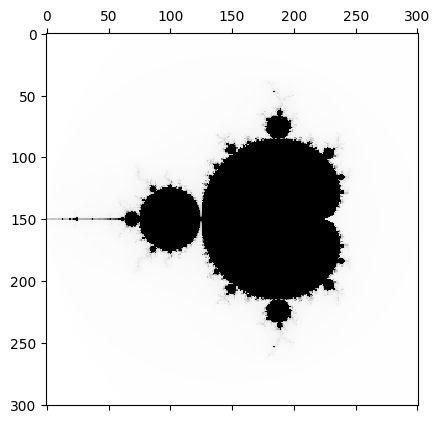

In [136]:
import numpy as np

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

t = time()
res = np.array([[m(z[i,j]) for j in range(s[1])] for i in range(s[0])])
print(time()-t)

import matplotlib.pyplot as plt

plt.matshow(res, cmap='binary')
plt.show()

/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_94825/1586525719.py:15: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_94825/1586525719.py:15: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_94825/1586525719.py:14: RuntimeWarning: overflow encountered in absolute
  res[np.abs(z)>2] = i


0.1573622226715088


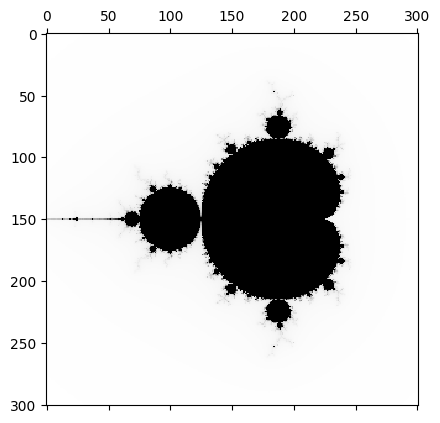

In [137]:
import numpy as np

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

t = time()

z0 = np.copy(z)
res = 255 * np.ones(s)
for i in range(255):
    res[np.abs(z)>2] = i
    z = z**2 + z0

print(time()-t)

import matplotlib.pyplot as plt

plt.matshow(res, cmap='binary')
plt.show()